In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# importacion del sataset ya trabajado

In [3]:
df = pd.read_csv(r"C:\Users\gaston\Documents\estudio\material henry compartido\Proyecto integrador\df_EDA")

In [4]:
print(f'Tamaño del dataset: {df.shape}')
print(f'las columnas del dataset son:{df.columns}')

Tamaño del dataset: (45476, 25)
las columnas del dataset son:Index(['Unnamed: 0', 'belongs_to_collection', 'budget', 'genres', 'id',
       'original_language', 'overview', 'popularity', 'release_date',
       'revenue', 'runtime', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'belong_to_collection', 'countries', 'companies',
       'languages', 'release_year', 'return', 'id.1', 'actors', 'director'],
      dtype='object')


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             45476 non-null  int64  
 1   belongs_to_collection  4491 non-null   object 
 2   budget                 45379 non-null  float64
 3   genres                 42995 non-null  object 
 4   id                     45379 non-null  object 
 5   original_language      45368 non-null  object 
 6   overview               44438 non-null  object 
 7   popularity             45379 non-null  float64
 8   release_date           45376 non-null  object 
 9   revenue                45379 non-null  float64
 10  runtime                45130 non-null  float64
 11  status                 45296 non-null  object 
 12  tagline                20398 non-null  object 
 13  title                  45376 non-null  object 
 14  vote_average           45376 non-null  float64
 15  vo

In [6]:
#informacion sobre datos nulos
df.isnull().sum()

Unnamed: 0                   0
belongs_to_collection    40985
budget                      97
genres                    2481
id                          97
original_language          108
overview                  1038
popularity                  97
release_date               100
revenue                     97
runtime                    346
status                     180
tagline                  25078
title                      100
vote_average               100
vote_count                 100
belong_to_collection     40988
countries                 6311
companies                11896
languages                 3991
release_year                97
return                      97
id.1                         0
actors                       0
director                   887
dtype: int64

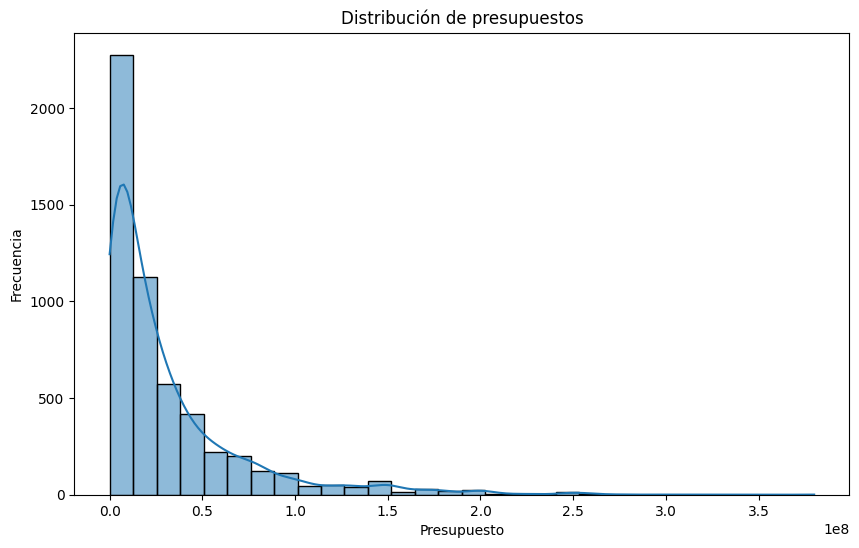

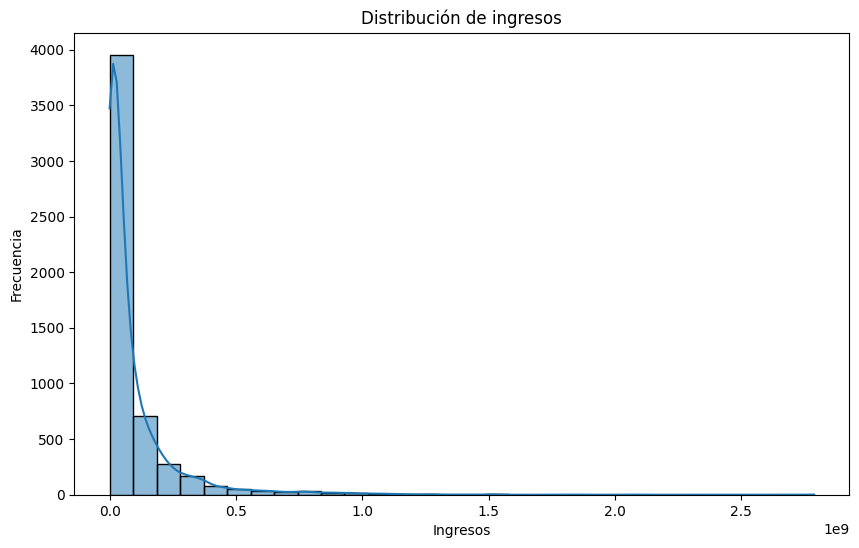

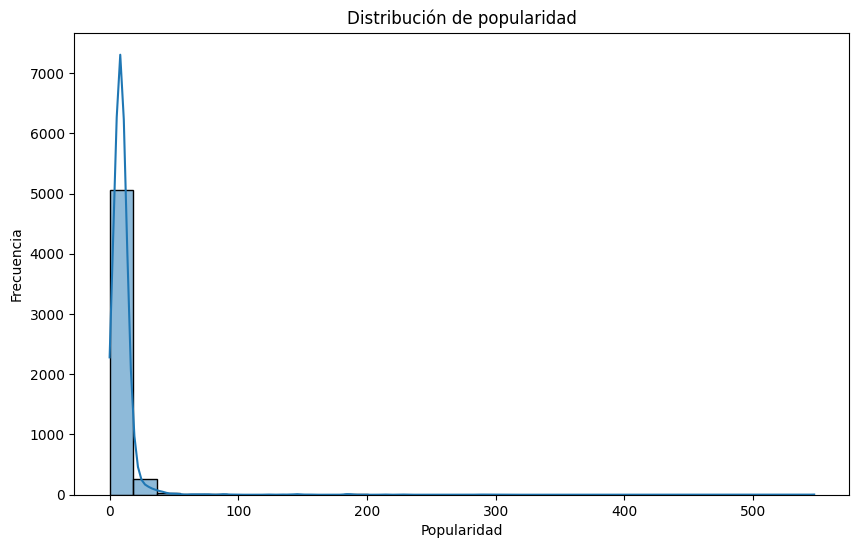

In [7]:
# Alteramos el dataframe para que los valores a evaluar no contengan el valor 0 ya que posee una cantidad desproporcionada al resto
df_economy=df[(df["budget"] > 0) & (df['revenue'] > 0) & (df['popularity'].apply(pd.to_numeric, errors='coerce').fillna(0) > 0)]


# Hacemos los graficos correspondientes a los histogramas de las variables 'budget', 'revenue' y 'popularity'
plt.figure(figsize=(10, 6))
sns.histplot(df_economy['budget'], bins=30, kde=True)
plt.title('Distribución de presupuestos')
plt.xlabel('Presupuesto')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df_economy['revenue'], bins=30, kde=True)
plt.title('Distribución de ingresos')
plt.xlabel('Ingresos')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df_economy['popularity'], bins=30, kde=True)
plt.title('Distribución de popularidad')
plt.xlabel('Popularidad')
plt.ylabel('Frecuencia')
plt.show()

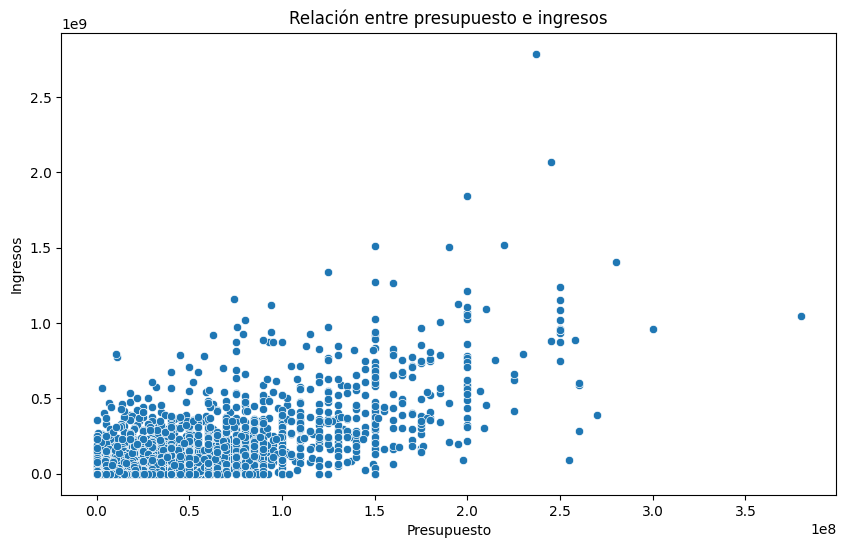

In [8]:
# Analizamos la relacion de presupuestos e ingresos para ver que tanto rindieron las peliculas en general
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', y='revenue', data=df)
plt.title('Relación entre presupuesto e ingresos')
plt.xlabel('Presupuesto')
plt.ylabel('Ingresos')
plt.show()

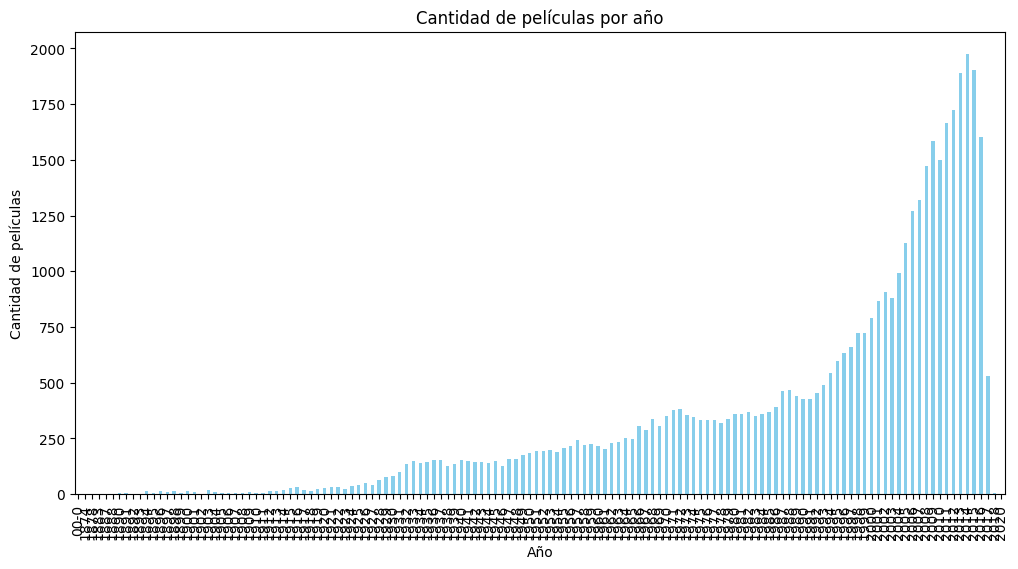

In [9]:
plt.figure(figsize=(12, 6))
df['release_year'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Cantidad de películas por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de películas')
plt.show()

C:\Users\gaston\AppData\Local\Temp\ipykernel_20756\56580876.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=directors_series.values, y=directors_series.index, palette='magma')


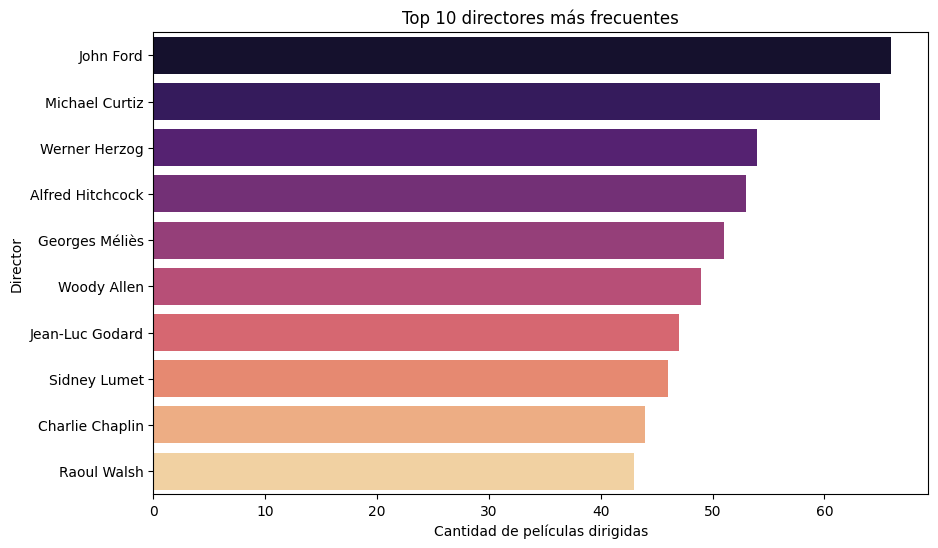

C:\Users\gaston\AppData\Local\Temp\ipykernel_20756\56580876.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='director',y='popularity', data=directors, palette='viridis')


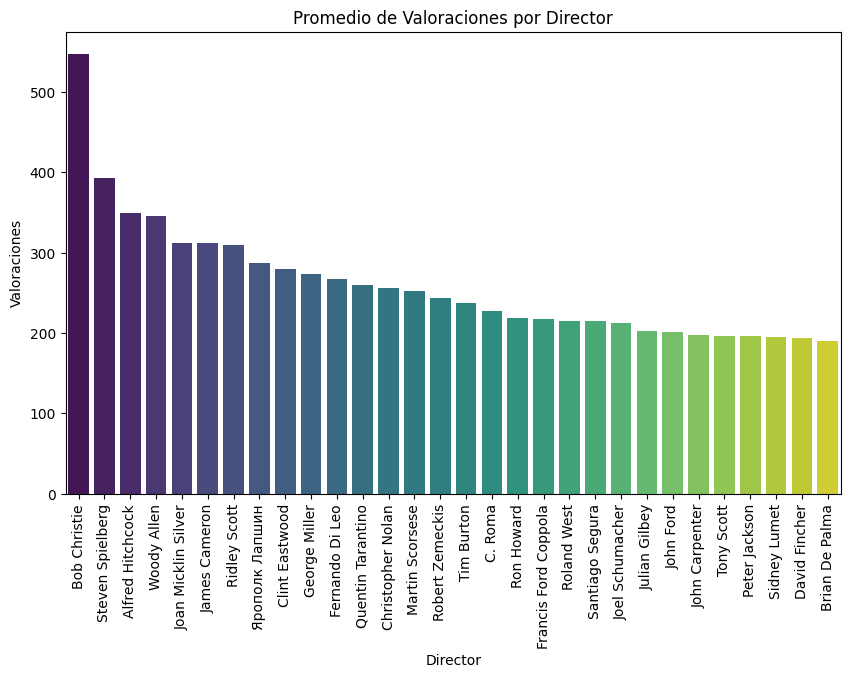

In [10]:
# Analizamos los directores para ver quienes son los mas frecuentes
directors_series = df['director'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=directors_series.values, y=directors_series.index, palette='magma')
plt.title('Top 10 directores más frecuentes')
plt.xlabel('Cantidad de películas dirigidas')
plt.ylabel('Director')
plt.show()

# Analizamos la popularidad total lograda por los directores
dir_avg_score = df.groupby('director')['popularity'].sum().reset_index() 
directors = dir_avg_score.sort_values(by='popularity', ascending=False).head(30)

plt.figure(figsize=(10,6))
sns.barplot(x='director',y='popularity', data=directors, palette='viridis')
plt.title('Promedio de Valoraciones por Director')
plt.xlabel('Director')
plt.ylabel('Valoraciones')
plt.xticks(rotation=90)
plt.show()

C:\Users\gaston\AppData\Local\Temp\ipykernel_20756\1403339322.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genres_series.values, y=genres_series.index, palette='coolwarm')


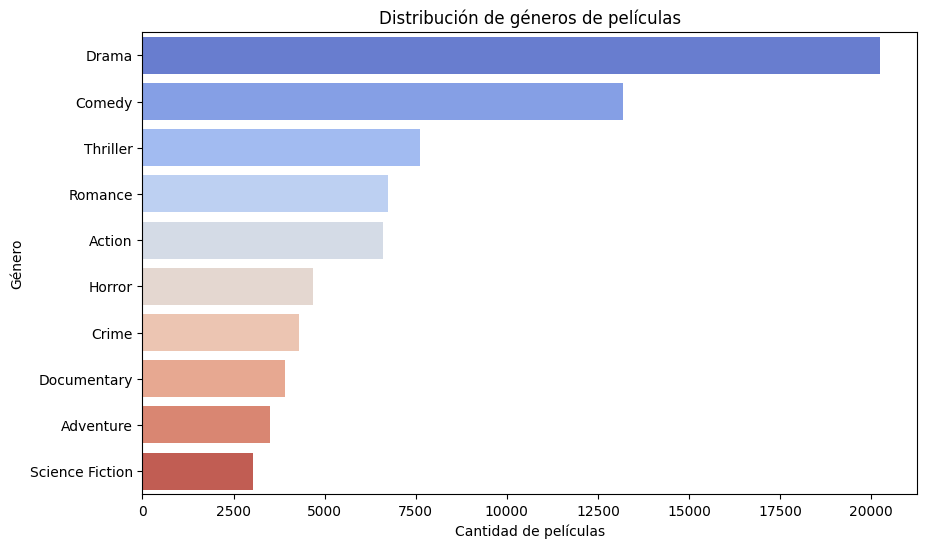

In [11]:
# Analizamos los generos separando cada uno cuando la pelicula en cuestion tiene varios
genres_series = df['genres'].str.split(', ').explode().value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=genres_series.values, y=genres_series.index, palette='coolwarm')
plt.title('Distribución de géneros de películas')
plt.xlabel('Cantidad de películas')
plt.ylabel('Género')
plt.show()


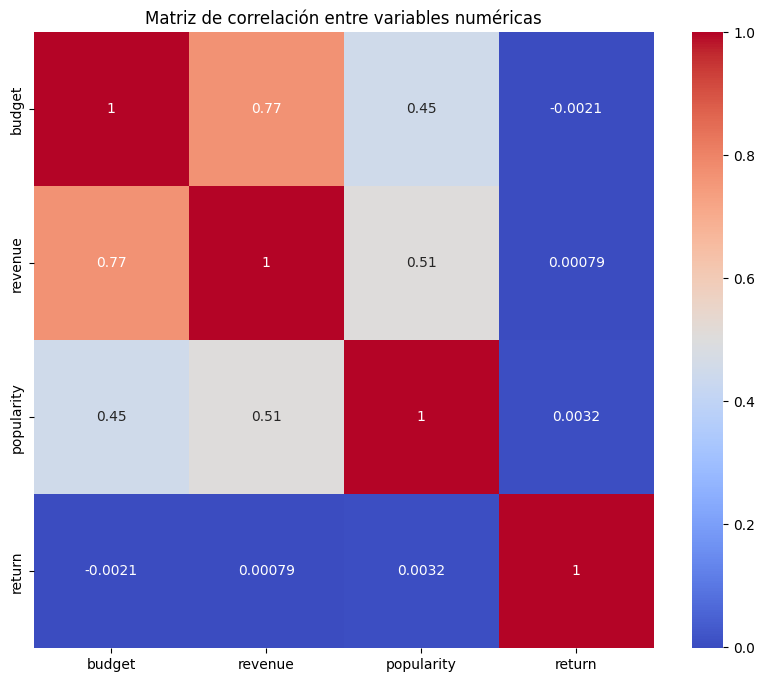

In [12]:
# Analizamos la correlacion entre algunas variables de caracter numerico
plt.figure(figsize=(10, 8))
sns.heatmap(df[['budget', 'revenue', 'popularity', 'return']].corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de correlación entre variables numéricas')
plt.show()